### Imports 

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
print(tf.__version__)
print(keras.__version__)

2.1.1
2.3.0-tf


### Building an Image Classifier Using Sequential API

#### Loand dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape
y_train_full.shape

(60000,)

In [6]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Creating the model using Sequential API

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


We can easily get a model's list of layers, to fetch a layer by its indeix or we can fetch it by name

In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer('dense') is hidden1)

dense
True


All the parameters of a layer can be accessed using its get_weights() and set_weights() methods

In [13]:
w, b = hidden1.get_weights()
print(w.shape)
print(w.shape[0]*w.shape[1])
print(b.shape)

(784, 300)
235200
(300,)


#### Compiling the model

In [14]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

#### Training and evaluating the model

In [15]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 118us/sample - loss: 0.7098 - accuracy: 0.7645 - val_loss: 0.5285 - val_accuracy: 0.8152
Epoch 2/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4840 - accuracy: 0.8308 - val_loss: 0.4590 - val_accuracy: 0.8440
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4399 - accuracy: 0.8460 - val_loss: 0.4135 - val_accuracy: 0.8546
Epoch 4/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4116 - accuracy: 0.8570 - val_loss: 0.3966 - val_accuracy: 0.8642
Epoch 5/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3907 - accuracy: 0.8616 - val_loss: 0.3804 - val_accuracy: 0.8702
Epoch 6/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.3749 - accuracy: 0.8686 - val_loss: 0.3758 - val_accuracy: 0.8672
Epoch 7/30
55000/55000 [==============================] 

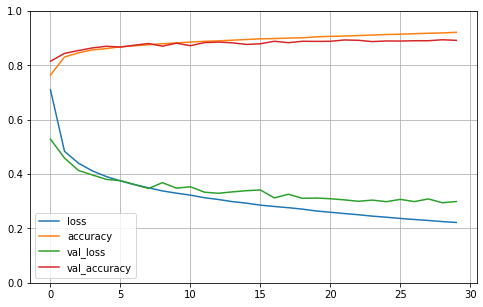

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
X_test = X_test/255.0
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3275 - accuracy: 0.8847


[0.32748696440458297, 0.8847]

#### Using the model to make predictions

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(type(y_proba))
print(y_proba.round(2))

<class 'numpy.ndarray'>
[[0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.98]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


Since we only care about the class with the highest estimated probability, we can use the predict_classes()

In [37]:
model.predict_classes(X_new)

array([9, 2, 1])

### Building a Regression MLP Using the Sequential API

In [33]:
housing = fetch_california_housing()

In [34]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [35]:
y_valid

array([1.58 , 1.857, 1.344, ..., 1.634, 3.   , 1.137])

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [37]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_valid, y_valid)
)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 95us/sample - loss: 1499029060013637500928.0000 - val_loss: 81898535702386.1719
Epoch 2/20
11610/11610 [==============================] - 1s 78us/sample - loss: 5700311250199.1953 - val_loss: 34947385.6517
Epoch 3/20
11610/11610 [==============================] - 1s 78us/sample - loss: 2432420.8419 - val_loss: 16.4602
Epoch 4/20
11610/11610 [==============================] - 1s 76us/sample - loss: 2.3711 - val_loss: 1.3100
Epoch 5/20
11610/11610 [==============================] - 1s 76us/sample - loss: 1.3229 - val_loss: 1.3091
Epoch 6/20
11610/11610 [==============================] - 1s 76us/sample - loss: 1.3230 - val_loss: 1.3087
Epoch 7/20
11610/11610 [==============================] - 1s 77us/sample - loss: 1.3228 - val_loss: 1.3095
Epoch 8/20
11610/11610 [==============================] - 1s 78us/sample - loss: 1.3227 - val_loss: 1.3087
Epoch 9/20
11610/11610 [===========

In [31]:
model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 44us/sample - loss: 1.3270


1.3269811218099077

In [32]:
model.predict(X_test[:3])

array([[2.0680861],
       [2.0680861],
       [2.0680861]], dtype=float32)